In [1]:
import numpy as np
import matplotlib.pyplot as plt

#kmeans code
def k_means_clustering(k, data_points, max_iterations=100):
    centroids = data_points[np.random.choice(data_points.shape[0], k, replace=False)]
    #initialize random centroids by  selecting k points
    for _ in range(max_iterations): #will run 100 times. If there is no change in the cluster assignments after this number of iterations, it will stop iter.
        #this is the formula for euclidean distance. between data point and centroid.
        distances = np.linalg.norm(data_points[:, np.newaxis] - centroids, axis=2)
        #have to assign data point to its closest cluster.
        cs = np.argmin(distances, axis=1)
        #have to calculate new centroids by taking mean of datas in each c
        new_cs = np.array([data_points[cs == i].mean(axis=0) for i in range(k)])
        
        if np.allclose(centroids, new_cs):#compair for closeness
            break
            
        centroids = new_cs
    else:
        print("Warning: K-Means clustering did not converge within the maximum number of iterations.")
    
    return cs, centroids#return final cluster and centroids.


In [2]:
def extract_seed_pixels(image, seed_image):
    seeds = np.where(seed_image[:,:,0] == 1)  # Assuming red channel denotes foreground seeds. 1 is presence of a pixel
    ans = image[seeds[0], seeds[1]] #extraction of pixel
    return ans


In [3]:
# def compute_likelihood(pixel, centroids, wk=0.1):
#     distances = np.linalg.norm(centroids - pixel, axis=1)
#     likelihoods = np.exp(-wk * distances)
#     return likelihoods
def compute_likelihood(pixel, centroids, wk=0.1):
    distances = np.linalg.norm(centroids - pixel, axis=1)
    likelihoods = np.exp(-wk * distances)#wk < = increase in influence of distance o likelihood.less distance = high likelihood
    return likelihoods


In [4]:
def assign_pixels(image, fg_likelihoods, bg_likelihoods):
    result = np.zeros(image.shape[:2], dtype=np.uint8)#arrays of 0.
    #finding likelihood pixels  that are most likely to be foreground or background and assigning them as such.
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if fg_likelihoods[i, j] > bg_likelihoods[i, j]:
                result[i, j] = 1  # Assign to foreground 1 if its higher(likelihood)
    return result


In [5]:
def seg(image, fg_img, bg_img, N):
    fg = extract_seed_pixels(image, fg_img)
    bg = extract_seed_pixels(image, bg_img)
    
    fg_clusters, fgc = k_means_clustering(N, fg) #kmeans to get cluster+centroid pairs for foreground objects
    bg_clusters, bgc = k_means_clustering(N, bg)
    
    fgl = np.zeros((image.shape[0], image.shape[1], N))
    bgl = np.zeros((image.shape[0], image.shape[1], N))
    
    for i in range(N):
        fgl[:,:,i] = compute_likelihood(image.reshape(-1, 3), fgc[i]).reshape(image.shape[:2])
        bgl[:,:,i] = compute_likelihood(image.reshape(-1, 3), bgc[i]).reshape(image.shape[:2])
    
    fglsum = fgl.sum(axis=2)  #sums of likelihood for each point
    bglsum = bgl.sum(axis=2)
    
    ans = assign_pixels(image, fglsum, bglsum)
    
    return ans


In [6]:
# def img1():
#     test_image = plt.imread("img/lady test.png")
#     foreground_seeds = plt.imread("img/lady stroke 1.png")
#     background_seeds = plt.imread("img/lady stroke 2.png")

#     N_values = [32, 64, 78 , 85]
#     for N in N_values:
#         segmented_image = seg(test_image, foreground_seeds, background_seeds, N)
#         plt.imshow(segmented_image)
#         plt.title(f'Segmented Image (N={N})')
#         plt.axis('off')
#     plt.show()

# def img2():   
#     test_image = plt.imread("img/Mona-lisa.png")
#     foreground_seeds = plt.imread("img/Mona-lisa stroke 1.png")
#     background_seeds = plt.imread("img/Mona-lisa stroke 2.png")
#     N_values = [32, 64, 128, 74]
#     for N in N_values:
#         segmented_image = seg(test_image, foreground_seeds, background_seeds, N)
#         plt.imshow(segmented_image)
#         plt.title(f'Segmented Image (N={N})')
#         plt.axis('off')
#         plt.show() 





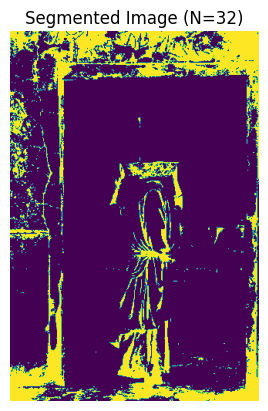

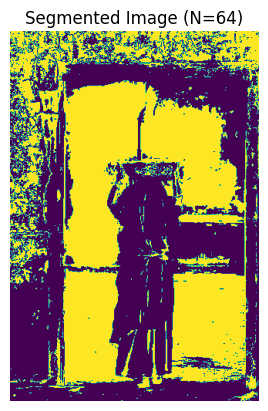

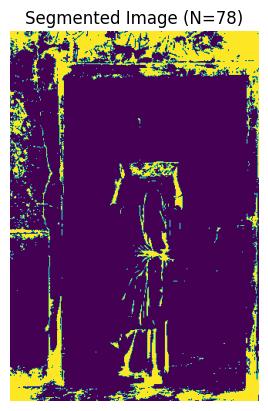

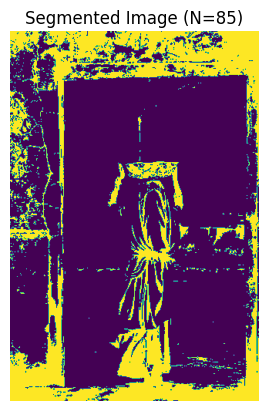

In [16]:
test_image = plt.imread("img/lady test.png")
foreground_seeds = plt.imread("img/lady stroke 1.png")
background_seeds = plt.imread("img/lady stroke 2.png")

N_values = [32, 64, 78 , 85]
for N in N_values:
        segmented_image = seg(test_image, foreground_seeds, background_seeds, N)
        plt.imshow(segmented_image)
        plt.title(f'Segmented Image (N={N})')
        plt.axis('off')
        plt.show()


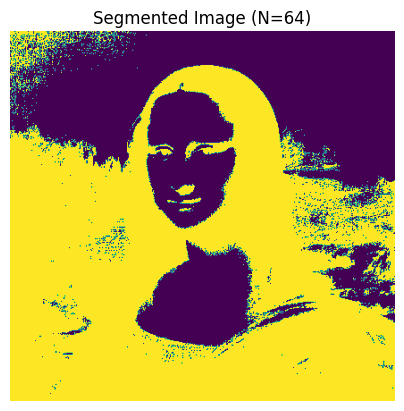

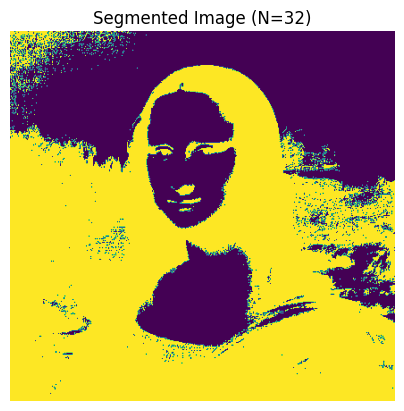

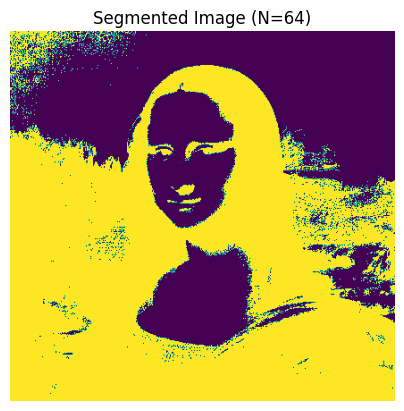

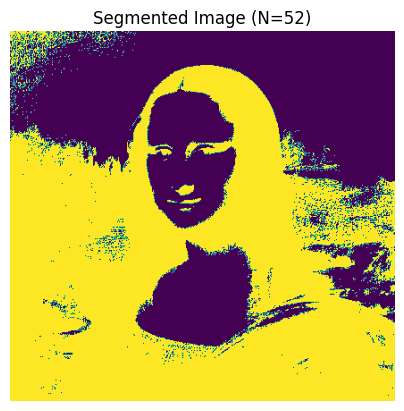

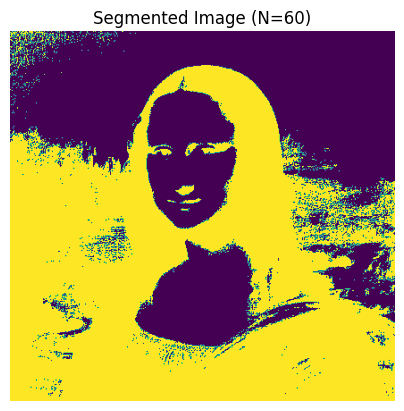

In [21]:
import warnings
warnings.filterwarnings("ignore")
test = plt.imread("img/Mona-lisa.png")
foreground_seeds = plt.imread("img/Mona-lisa stroke 1.png")
background_seeds = plt.imread("img/Mona-lisa stroke 2.png")
N_values = [64 ,32, 64, 52, 60]
for N in N_values:
        segmented_image = seg(test, foreground_seeds, background_seeds, N)
        plt.imshow(segmented_image)
        plt.title(f'Segmented Image (N={N})')
        plt.axis('off')
        plt.show() 

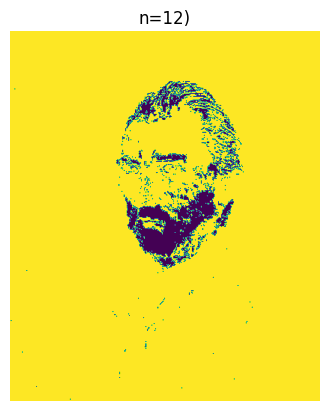

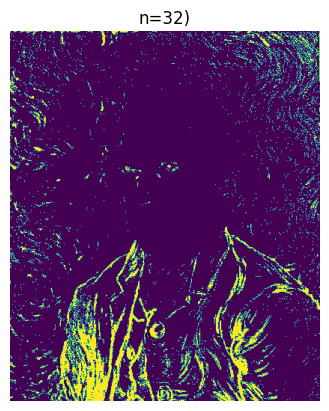

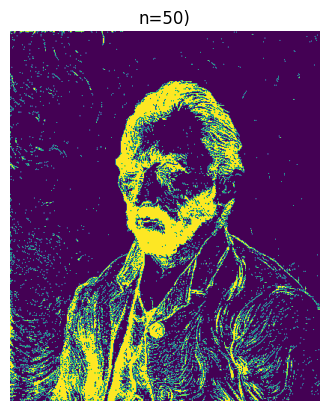

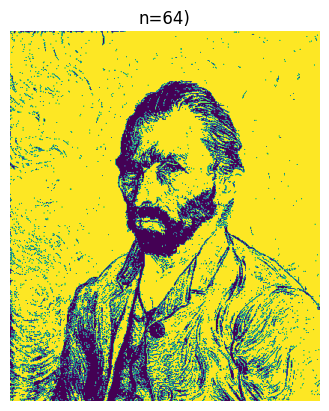

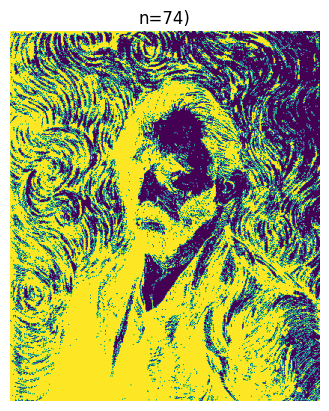

In [41]:
test_img = plt.imread("Q1 Dataset/van Gogh.png")
fg_seed_image = plt.imread("Q1 Dataset/van Gogh stroke.png")
N_values = [12,32,50, 64,74]
for N in N_values:
    segmented_image = seg(test_img, fg_seed_image, fg_seed_image, N)
    plt.imshow(segmented_image)
    plt.title(f'n={N})')
    plt.axis('off')
    plt.show() 

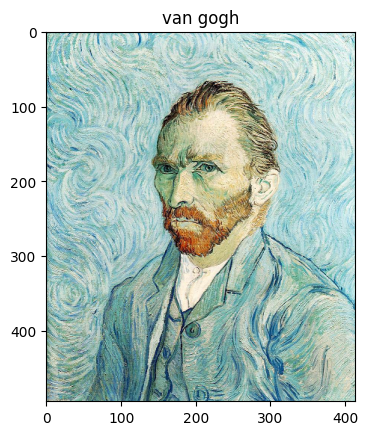

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("Q1 Dataset/van Gogh.png")
plt.imshow(img)
plt.title("van gogh")
plt.show()